In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import os
import data_visualization as dv
import dill
import scipy 
from scipy.stats import norm
from scipy import stats
import sys
import importlib
import pingouin as pg
import pandas as pd
import analysis_utilities as au
import stats_functions
from itertools import combinations
'''
This make figs script uses the objects instead of pickling and calculating like v1
'''

'\nThis make figs script uses the objects instead of pickling and calculating like v1\n'

In [2]:
sys.path.insert(0,r'D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement')
import plot_functions 
import Subject_Object_v2
importlib.reload(Subject_Object_v2)
importlib.reload(plot_functions)
importlib.reload(stats_functions)
import plot_functions as pf
import read_data_functions as rdf
import stats_functions as sf


## Initial Thangs

In [3]:
experiment = 'Exp1'

In [4]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir(f'D:\OneDrive - University of Delaware - o365\Subject_Data\MatchPennies_Agent_{experiment}')
PATH = os.getcwd()
SAVE_PATH = f'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Group_Figures\\{experiment}\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)

if experiment == 'Exp1':
    tp3_title = "1000 [50]"
    tp4_title = "1000 [150]"
    tp5_title = '1100 [50]'
    tp6_title = "1100 [150]"
    tp7_title = "1200 [50]"
    tp8_title = '1200 [150]'
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
    xticklabel = 'Agent Movement Onset Time (ms)'
    num_blocks = len(trial_block_titles)
    num_rows,num_cols = 2,3
    
if experiment == 'Exp2':
    tp3_title = "Win = 1\nIncorrect = 0\nIndecision = 0"
    tp4_title = "Win = 1\nIncorrect = -1\nIndecision = 0"
    tp5_title = "Win = 1\nIncorrect = 0\nIndecision = -1"
    tp6_title = "Win = 1\nIncorrect = -1\nIndecision = -1"
    trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title]
    num_blocks = len(trial_block_titles)
    xticklabel = 'Feedback Condition'

    num_rows,num_cols = 2,2
    


## Pickle Objects

In [5]:
if 'subject_objects' not in locals():
    load_path = r'Subjects_Analyzed'
    subject_objects = rdf.pickle_subject_objects(figures_pull_list,load_path)
    # pos_group = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_pos_task_leave_time', task_movement_time_metric_name = 'player_pos_task_movement_time',
    #                                     reaction_time_metric_name = 'player_pos_reaction_time', reaction_movement_time_metric_name = 'player_pos_reaction_movement_time')
    # pos_group.analyze_data()
    # vel_group_linear = Subject_Object_v2.Group(subject_objects, select_trials = 'All Trials', num_stds_for_reaction_time = 2, 
    #                                     task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
    #                                     reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    # vel_group_linear.analyze_data()

    vel_group_thresh = Subject_Object_v2.Group(subject_objects, select_trials = 'Second Half', num_stds_for_reaction_time = 2, 
                                        task_leave_time_metric_name = 'player_velocity_task_leave_time_linear',task_movement_time_metric_name = 'player_velocity_task_movement_time_linear',
                                        reaction_time_metric_name = 'player_velocity_reaction_time_linear', reaction_movement_time_metric_name = 'player_velocity_reaction_movement_time_linear')
    vel_group_thresh.analyze_data()

Sub1
Sub2
Sub3
Sub4
Sub5
Sub6
Sub7
Sub8
Sub9
Sub10
Sub11
Sub12
Sub13
Sub14
Sub15
Sub16
Sub17
Sub18
Sub19
Sub20


D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:564: RuntimeWarning: divide by zero encountered in divide
  self.mu_s = (self.phat_correct*self.mhat_correct - self.phat_error*self.mhat_error)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:575: RuntimeWarning: divide by zero encountered in divide
  self.mu_s_alternate = (self.phat_correct*self.mhat_correct_alternate - self.phat_error*self.mhat_error_alternate)/(self.phat_correct - self.phat_error)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:552: RuntimeWarning: Mean of empty slice
  self.mean_player_leave_time_on_errors = np.nanmean(self.player_leave_time_on_errors,axis=1)
D:\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Subject_Object_v2.py:557: RuntimeWarning: Mean of empty slice
  self.mean_player

In [6]:
group = vel_group_thresh

## Set Save to True or False

In [7]:
save = False

# Experiment 1

### Create DataFrame for Pingouin

In [8]:
wins = group.player_perc_wins.flatten().tolist()
indecisions = group.player_perc_indecisions.flatten().tolist()
incorrects = group.player_perc_incorrects.flatten().tolist()
correct_decisions = group.phat_correct.flatten().tolist()
leave_times = np.nanmedian(group.player_task_leave_time,axis=2).flatten().tolist()
first_quartile_leave_times = np.quantile(group.player_task_leave_time,0.25,axis=2).flatten().tolist()
leave_time_sd = np.nanstd(group.player_task_leave_time,axis=2).flatten().tolist()
gamble_leave_time = np.nanmedian(group.player_gamble_task_leave_time,axis=2).flatten().tolist()
subject_number = np.repeat(np.arange(1,21,1,dtype=int),6).tolist()
alt_condition = np.tile(['1000 (50)','1000 (150)','1100 (50)','1100 (150)', '1200 (50)', '1200 (150)'],num_subjects).tolist()
if experiment == 'Exp1':
    condition_mean = np.tile(['1000','1000','1100','1100','1200','1200'],num_subjects) 
    condition_sd = np.tile(['50','150'],num_subjects*3)
    condition = np.tile(np.arange(1,7,1,dtype=int),num_subjects).tolist()
    df = pd.DataFrame(np.array([subject_number,condition,condition_mean,condition_sd,leave_times,wins,indecisions,incorrects,
                            correct_decisions,gamble_leave_time,leave_time_sd]).T,
                        columns=['Subject','Condition','Condition Mean','Condition SD','Median Leave Time','Wins','Indecisions','Incorrects',              'Correct Decisions','Median Gamble Leave Time','SD Leave Time'])
else:
    condition_name = np.tile(['1,0,0','1,-1,0','1,0,-1','1,-1,-1'],num_subjects) 
    condition = np.tile(np.arange(1,5,1,dtype=int),num_subjects).tolist()
    df = pd.DataFrame(np.array([subject_number,condition,condition_name,leave_times,wins,indecisions,incorrects,
                            correct_decisions,gamble_leave_time,leave_time_sd]).T,
                        columns=['Subject','Condition','Condition Name','Median Leave Time','Wins','Indecisions','Incorrects',
                           'Correct Decisions','Median Gamble Leave Time','SD Leave Time'])

df = df.astype('float64')
df = df.astype({'Subject':'int32','Condition':'int32','Condition Mean':'int32','Condition SD':'int32'})
# dill.dump(df,open(save_path+'\\metrics_df_all_subjects.pkl','wb')) 
df

c:\Users\Seth Sullivan\anaconda3\envs\py311\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


,Subject,Condition,Condition Mean,Condition SD,Median Leave Time,Wins,Indecisions,Incorrects,Correct Decisions,Median Gamble Leave Time,SD Leave Time
0,1,1,1000,50,1188.50,72.5,5.0,22.5,0.575,1168.25,79.591688
1,1,2,1000,150,1191.75,67.5,22.5,10.0,0.600,1177.75,95.401414
2,1,3,1100,50,1263.00,55.0,20.0,25.0,0.675,1161.75,115.402041
3,1,4,1100,150,1143.25,50.0,5.0,45.0,0.475,1148.00,135.323825
4,1,5,1200,50,1132.50,42.5,2.5,55.0,0.500,1132.50,109.663166
...,...,...,...,...,...,...,...,...,...,...,...
115,20,2,1000,150,914.25,42.5,7.5,50.0,0.425,903.75,166.694069
116,20,3,1100,50,1019.25,50.0,12.5,37.5,0.600,971.00,156.137327
117,20,4,1100,150,1005.75,50.0,15.0,35.0,0.550,953.50,189.114673
118,20,5,1200,50,1002.25,52.5,5.0,42.5,0.525,1002.25,147.672365


## Initialize bootstrap

In [9]:
a = au.bootstrap([0,1,2],[0,1,2],paired=True) # Just initializing bootstrap

## Median Leave Times

In [10]:
# anova,statistics = sf.run_statistics(df, dependent_variable_name='Median Leave Time',
#                                      arr = np.nanmedian(group.player_task_leave_time,axis=2))
# anova

Anova

In [11]:
anova = pg.rm_anova(data=df, dv='Median Leave Time', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,51325.157292,2,38,25662.578646,3.354638,0.045534,0.053925,0.024093,0.860042
1,Condition SD,80264.268750,1,19,80264.268750,8.644388,0.008403,0.008403,0.037172,1.000000
2,Condition Mean * Condition SD,1123.259375,2,38,561.629687,0.159027,0.853538,0.746017,0.000540,0.616696


Follow up Comparisons collapse across condition means

In [37]:
metric= np.nanmedian(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,1]))
data2 = np.concatenate((metric[:,2],metric[:,3]))
data3 = np.concatenate((metric[:,4],metric[:,5]))
data = np.array((data1,data2,data3)).T
pval1 = au.bootstrap(data[:,0],data[:,1],paired=True,M=1e7,alternative='two-sided')
pval2 = au.bootstrap(data[:,0],data[:,2],paired=True,M=1e7,alternative='two-sided')
pval3 = au.bootstrap(data[:,1],data[:,2],paired=True,M=1e7,alternative='two-sided')
keys = ['01','02','12']
pvals = [pval1,pval2,pval3]
pvals_corrected = au.holmbonferroni_correction(pvals)
median_leave_time_pvals_mean_collapse = dict(zip(keys,pvals_corrected))

cles1 = au.cles(data2,data1,paired=True)
cles2 = au.cles(data1,data3,paired=True)
cles3 = au.cles(data2,data3,paired=True)
median_leave_time_cles_mean_collapse = dict(zip(keys,[cles1,cles2,cles3]))

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 
print(median_leave_time_pvals_mean_collapse)
print(median_leave_time_cles_mean_collapse)

{'01': 0.0376998, '02': 0.5412891, '12': 0.046057799999999996}
{'01': 75.0, '02': 55.00000000000001, '12': 67.5}


In [ ]:
{'01': 0.0376476, '02': 0.5414732, '12': 0.0459684}
{'01': 75.0, '02': 55.00000000000001, '12': 67.5}

In [13]:
metric= np.nanmedian(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,1]))
data2 = np.concatenate((metric[:,2],metric[:,3]))
data3 = np.concatenate((metric[:,4],metric[:,5]))
data = np.array((data1,data2,data3)).T
p,c,d = sf.pairwise_bootstrap(data,paired = True,condition_nums =['0','1','2'],M=1e7)

['01', '02', '12']


 Boxplot Collapsed Across Means

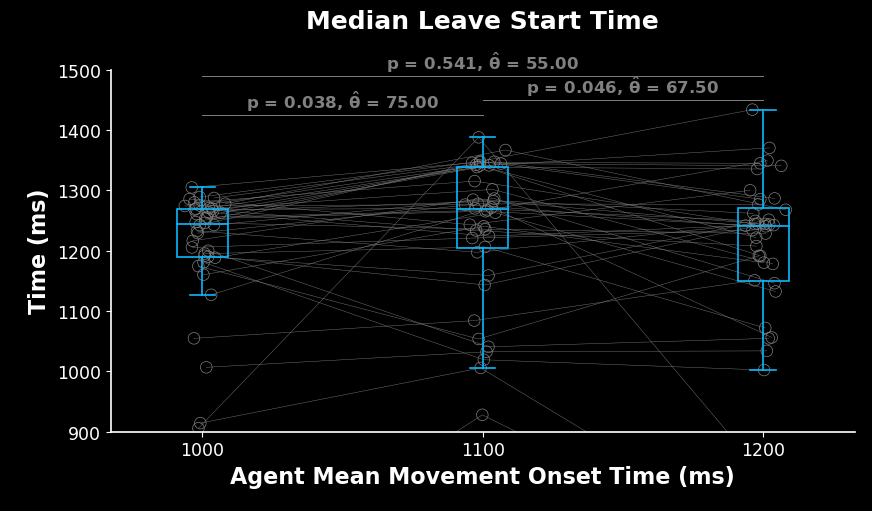

In [ ]:
metric = np.vstack((data1,data2,data3)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.boxplot(ax,xlocs[2],data3,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1425,p_val=median_leave_time_pvals_mean_collapse['01'],cles=median_leave_time_cles_mean_collapse['01'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[1],xlocs[2],1450,p_val=median_leave_time_pvals_mean_collapse['12'],cles=median_leave_time_cles_mean_collapse['12'],fontsize=12,h=3)
dv.stat_annotation(ax,xlocs[0],xlocs[2],1490,p_val=median_leave_time_pvals_mean_collapse['02'],cles=median_leave_time_cles_mean_collapse['02'],fontsize=12,h=3)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time', pad=30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

Follow up Comparisons collapse across condition sds

In [ ]:
metric    = np.nanmedian(group.player_task_leave_time,axis=2)
median_leave_time_sd50_collapse = np.concatenate((metric[:,0],metric[:,2],metric[:,4]))
median_leave_time_sd150_collapse = np.concatenate((metric[:,1],metric[:,3],metric[:,5]))
median_leave_time_pval_sd_collapse = au.bootstrap(median_leave_time_sd50_collapse,median_leave_time_sd150_collapse,paired=True,M=1e7)
print(f'Compare 50 to 150: Pval = {median_leave_time_pval_sd_collapse}')


median_leave_time_cles_sd_collapse = au.cles(median_leave_time_sd50_collapse,median_leave_time_sd150_collapse,paired=True)
print(f'Compare 50 to 150: CLES = {median_leave_time_cles_sd_collapse}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 50 to 150: Pval = 0.0001749
Compare 50 to 150: CLES = 76.66666666666667


In [ ]:
median_leave_time_sd50_collapse

array([1188.5 , 1270.75, 1287.5 , 1006.75, 1247.5 , 1190.  , 1305.  ,
       1246.25, 1263.  , 1278.  , 1174.5 , 1280.25,  905.75, 1275.  ,
       1216.5 , 1285.75, 1263.75, 1270.  , 1242.5 , 1180.75, 1263.  ,
       1341.5 , 1347.5 , 1032.5 , 1342.5 , 1159.  , 1345.75, 1235.75,
       1344.5 , 1367.  , 1053.75, 1315.5 , 1388.  , 1341.25, 1284.75,
       1243.25, 1224.25, 1301.75, 1346.5 , 1019.25, 1132.5 , 1370.5 ,
       1286.75, 1034.  , 1221.75, 1251.5 , 1434.  , 1228.5 , 1340.75,
       1268.  , 1191.5 , 1244.25,  837.75, 1191.5 , 1262.  , 1300.25,
       1243.5 , 1178.25, 1345.  , 1002.25])

In [ ]:
anova,statistics = sf.run_statistics(df, dependent_variable_name='Median Leave Time',
                                     arr = metric,
                                     alternative='two-sided')

Non-significant interaction, collapsing across conditions...
[0.01883054 0.54143662 0.01532681]
{'01': 0.03766108, '02': 0.54143662, '12': 0.04598043}
[0.00059189]
{'01': 0.00059189}


In [ ]:
statistics[2]

{'01': 0.00059189}

 Boxplot Collapsed Across Means

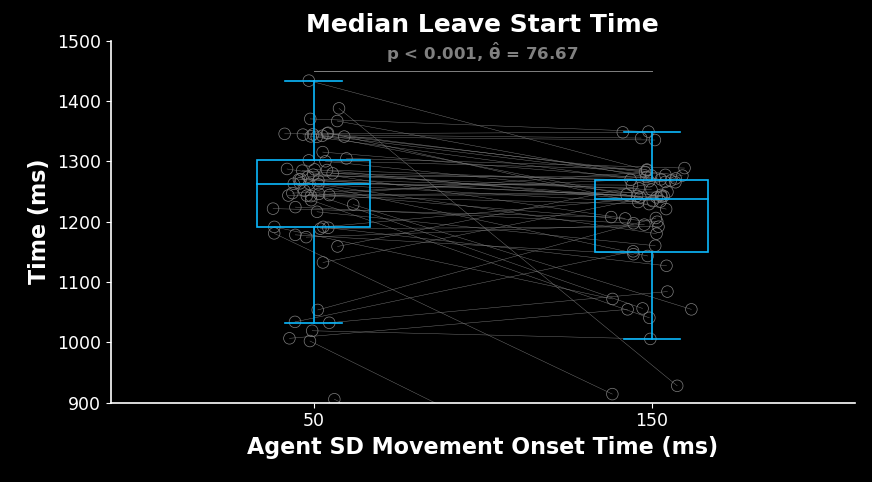

In [ ]:
metric = np.vstack((median_leave_time_sd50_collapse,median_leave_time_sd150_collapse)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],median_leave_time_sd50_collapse,box_width=bw)
dv.boxplot(ax,xlocs[1],median_leave_time_sd150_collapse,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1450,h = 10,p_val=median_leave_time_pval_sd_collapse,cles=median_leave_time_cles_sd_collapse, fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## SD Leave Times

Anova

In [ ]:
anova = pg.rm_anova(data=df, dv='SD Leave Time', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,8164.661333,2,38,4082.330666,7.886037,0.001366,0.001367,0.026066,0.999785
1,Condition SD,15156.340575,1,19,15156.340575,15.330131,0.000930,0.000930,0.047331,1.000000
2,Condition Mean * Condition SD,6813.097496,2,38,3406.548748,3.510460,0.039904,0.051672,0.021846,0.802931


Follow up Comparisons collapse across condition means

In [ ]:
metric    = np.nanstd(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,1]))
data2 = np.concatenate((metric[:,2],metric[:,3]))
data3 = np.concatenate((metric[:,4],metric[:,5]))
pval1 = au.bootstrap(data1,data2,paired=True,M=1e6)
pval2 = au.bootstrap(data1,data3,paired=True,M=1e6)
pval3 = au.bootstrap(data2,data3,paired=True,M=1e6)
keys = ['01','02','12']
pvals = [pval1,pval2,pval3]
_,pvals_corrected = pg.multicomp(pvals)
pvals_dict = dict(zip(keys,pvals_corrected))


cles1 = au.cles(data2,data1,paired=True)
cles2 = au.cles(data2,data3,paired=True)
cles3 = au.cles(data1,data3,paired=True)
cles_dict = dict(zip(keys,[cles1,cles2,cles3]))

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 
print(pvals_dict)
print(cles_dict)

{'01': 0.140994, '02': 0.015372, '12': 0.140994}
{'01': 65.0, '02': 42.5, '12': 40.0}


 Boxplot Collapsed Across Means

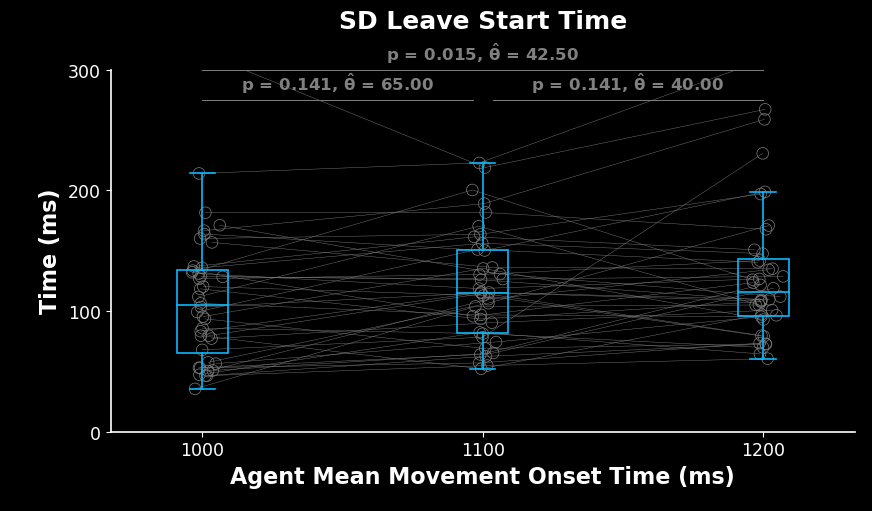

In [ ]:
metric = np.vstack((data1,data2,data3)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(0,400,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.boxplot(ax,xlocs[2],data3,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1]-0.2,275,p_val=pvals_dict['01'],cles=cles_dict['01'],fontsize=12,h=4)
dv.stat_annotation(ax,xlocs[1]+0.2,xlocs[2],275,p_val=pvals_dict['12'],cles=cles_dict['12'],fontsize=12,h=4)
dv.stat_annotation(ax,xlocs[0],xlocs[2],300,p_val=pvals_dict['02'],cles=cles_dict['02'],fontsize=12,h=4)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('SD Leave Start Time',pad = 30)
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

Follow up Comparisons collapse across condition sds

In [ ]:
metric    = np.nanmedian(group.player_task_leave_time,axis=2)
data1 = np.concatenate((metric[:,0],metric[:,2],metric[:,4]))
data2 = np.concatenate((metric[:,1],metric[:,3],metric[:,5]))
pval1 = au.bootstrap(data1,data2,paired=True)
print(f'Compare 50 to 150: Pval = {pval1}')


cles1 = au.cles(data1,data2,paired=True)
print(f'Compare 50 to 150: CLES = {cles1}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 50 to 150: Pval = 0.0001
Compare 50 to 150: CLES = 76.66666666666667


 Boxplot Collapsed Across Means

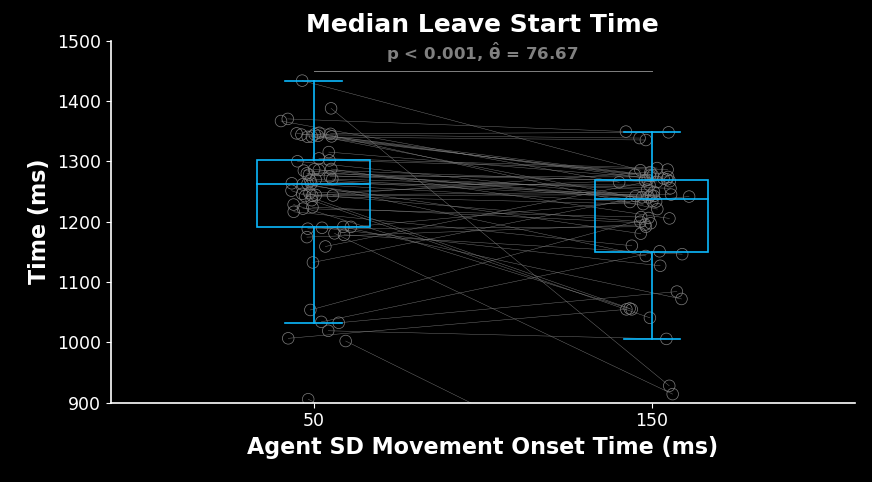

In [ ]:
metric = np.vstack((data1,data2)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(900,1600,100)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],1450,h = 10,p_val=pval1,cles=cles1, fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Time (ms)')
ax.set_title('Median Leave Start Time')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

## Correct Decisions (Doesn't matter if indecision)

In [ ]:
anova = pg.rm_anova(data=df, dv='Correct Decisions', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,1.743792,2,38,0.871896,62.078929,1.064306e-12,1.604211e-09,0.465545,0.699234
1,Condition SD,0.057422,1,19,0.057422,6.133070,2.284266e-02,2.284266e-02,0.027884,1.000000
2,Condition Mean * Condition SD,0.000375,2,38,0.000188,0.020021,9.801883e-01,9.717912e-01,0.000187,0.894300


Follow up mean comparisons

In [ ]:
metric    = group.phat_correct*100
data1 = np.concatenate((metric[:,0],metric[:,1]))
data2 = np.concatenate((metric[:,2],metric[:,3]))
data3 = np.concatenate((metric[:,4],metric[:,5]))
pval1 = au.bootstrap(data1,data2,paired=True)
pval2 = au.bootstrap(data2,data3,paired=True)
pval3 = au.bootstrap(data1,data3,paired=True)
print(f'Compare 1000 to 1100: Pval = {pval1}')
print(f'Compare 1100 to 1200: Pval = {pval2}')
print(f'Compare 1000 to 1200: Pval = {pval3}')


cles1 = au.cles(data1,data2,paired=True)
cles2 = au.cles(data2,data3,paired=True)
cles3 = au.cles(data1,data3,paired=True)
print(f'Compare 1000 to 1100: Cles = {cles1}')
print(f'Compare 1000 to 1200: Cles = {cles2}')
print(f'Compare 1100 to 1200: Cles = {cles3}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 1000 to 1100: Pval = 0.0002
Compare 1100 to 1200: Pval = 0.0
Compare 1000 to 1200: Pval = 0.0
Compare 1000 to 1100: Cles = 86.25
Compare 1000 to 1200: Cles = 90.0
Compare 1100 to 1200: Cles = 92.5


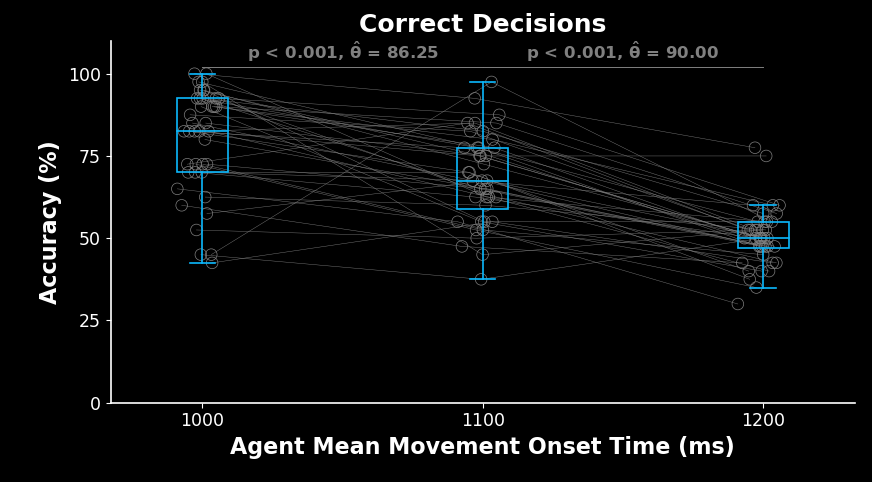

In [ ]:
metric = np.vstack((data1,data2,data3)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles)//2)
ylocs = np.arange(0,125,25)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.boxplot(ax,xlocs[2],data3,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],102,p_val=pval1,cles=cles1,fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[1],xlocs[2],102,p_val=pval2,cles=cles2,fontsize=12,h=1)
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['1000','1100','1200'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+10)

ax.set_xlabel('Agent Mean Movement Onset Time (ms)')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Correct Decisions')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
plt.show()

Collapse across SDS

In [ ]:
metric    = group.phat_correct*100
data1 = np.concatenate((metric[:,0],metric[:,2],metric[:,4]))
data2 = np.concatenate((metric[:,1],metric[:,3],metric[:,5]))
pval1,dist = au.bootstrap(data1,data2,paired=True,return_distribution=True,test='median')
print(f'Compare 50 to 150: Pval = {pval1}')


cles1 = au.cles(data1,data2,paired=True)
print(f'Compare 50 to 150: CLES = {cles1}')

# dill.dump(pval1,open(save_path+'\\1000_1100_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval2,open(save_path+'\\1000_1200_median_leave_time_pval.pkl','wb')) 
# dill.dump(pval3,open(save_path+'\\1100_1200_median_leave_time_pval.pkl','wb')) 

Compare 50 to 150: Pval = 0.3677
Compare 50 to 150: CLES = 64.16666666666667


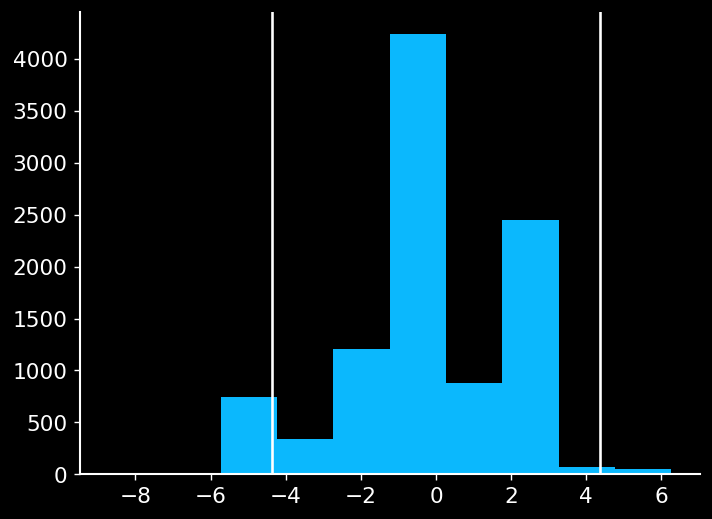

In [ ]:
mean_diff = np.nanmean(data1-data2)
plt.hist(dist)
plt.axvline(mean_diff)
plt.axvline(-mean_diff)

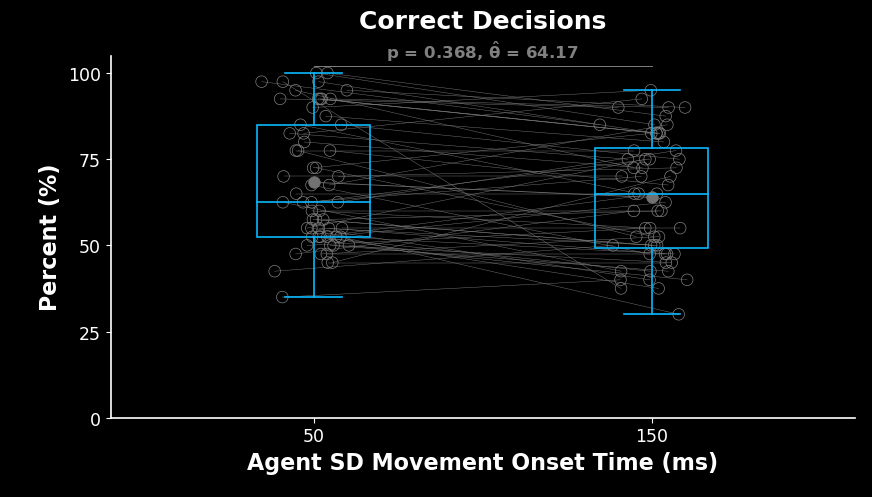

In [ ]:
metric = np.vstack((data1,data2)).T
w,h = 11,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.3,0.9,w-1.4,h-1.3))
xlocs = np.linspace(8,w,num=len(trial_block_titles)//3)
ylocs = np.arange(0,125,25)
bw = 1
# pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.boxplot(ax,xlocs[0],data1,box_width=bw)
dv.boxplot(ax,xlocs[1],data2,box_width=bw)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.15, include_mean = True, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],102,h = 1,p_val=pval1,cles=cles1, fontsize = 12)

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(['50','150'])
ax.set_xlim(min(xlocs)-1.8*bw,max(xlocs)+1.8*bw)
ax.set_ylim(min(ylocs),max(ylocs)+5)

ax.set_xlabel('Agent SD Movement Onset Time (ms)')
ax.set_ylabel('Percent (%)')
ax.set_title('Correct Decisions',pad=20)

if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'median_leave_time', dpi = 400, transparent = True)
else:
    axmain.set_axis_off()
# plt.tight_layout()
plt.show()

## Wins

### Stats

Anova

In [ ]:
anova = pg.rm_anova(data=df, dv='Wins', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,15808.4375,2,38,7904.21875,39.993051,4.478186e-10,6.363535e-09,0.486026,0.855518
1,Condition SD,421.8750,1,19,421.87500,12.391304,2.288363e-03,2.288363e-03,0.024614,1.000000
2,Condition Mean * Condition SD,3259.6875,2,38,1629.84375,20.412916,9.532036e-07,1.913515e-06,0.163170,0.936289


In [ ]:
anova['p-GG-corr'][2]

1.9135145663811984e-06

Follow up Comparisons (don't collapse)

In [ ]:
wins_pvals,wins_cles  = sf.pairwise_bootstrap(group.player_perc_wins)
print(wins_pvals)
print(wins_cles)

SystemError: CPUDispatcher(<function _nb_mean_bootstrap at 0x000002C69A6167A0>) returned a result with an exception set

 Boxplot Collapsed Across Means

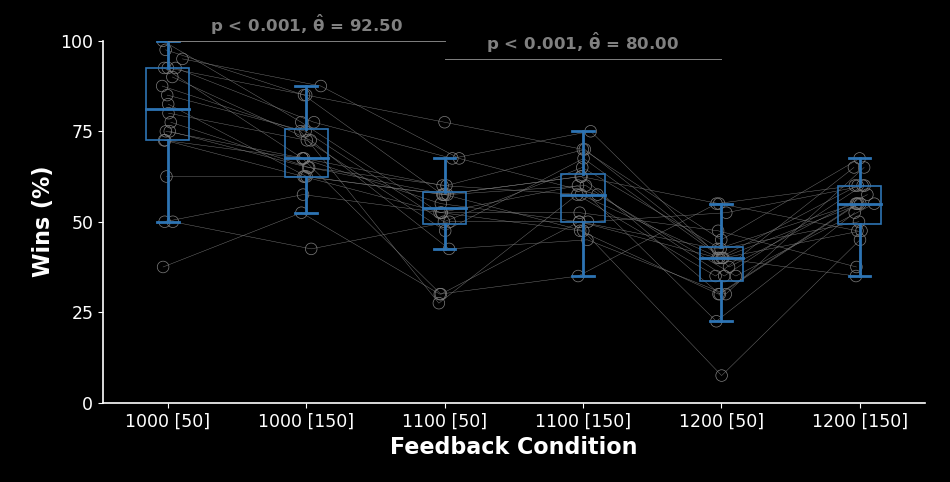

In [ ]:

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,group.player_perc_wins,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=group.player_perc_wins.T, noise_scale=0.1, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],100,p_val=wins_pvals['02'],cles=wins_cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],95,p_val=wins_pvals['24'],cles=wins_cles['24'],fontsize=12,h=1)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Feedback Condition')
ax.set_ylabel('Wins (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

## Incorrects

### Stats

Anova

In [ ]:
anova = pg.rm_anova(data=df, dv='Incorrects', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,7516.979167,2,38,3758.489583,29.847334,1.615630e-08,5.323365e-07,0.256880,0.765352
1,Condition SD,60.208333,1,19,60.208333,0.810958,3.791101e-01,3.791101e-01,0.002761,1.000000
2,Condition Mean * Condition SD,951.979167,2,38,475.989583,4.259979,2.141615e-02,3.197883e-02,0.041942,0.778698


Follow up Comparisons (don't collapse)

In [ ]:
incorrects_pvals,incorrects_cles  = sf.pairwise_bootstrap(group.player_perc_incorrects)
print(incorrects_pvals)
print(incorrects_cles)

[2.365369e-01 5.436820e-02 6.480000e-05 0.000000e+00 3.100000e-06
 1.456569e-01 2.708100e-03 0.000000e+00 1.580000e-05 4.784377e-01
 0.000000e+00 2.746200e-03 2.000000e-06 1.118077e-01 9.532000e-04]
{'01': 0.4730738, '02': 0.271841, '03': 0.0005832000000000001, '04': 0.0, '05': 3.41e-05, '12': 0.43697070000000005, '13': 0.0189567, '14': 0.0, '15': 0.00015800000000000002, '23': 0.4784377, '24': 0.0, '25': 0.016477199999999997, '34': 2.4e-05, '35': 0.4472308, '45': 0.0076256}
{'01': 0.4730738, '02': 0.271841, '03': 0.0005832000000000001, '04': 0.0, '05': 3.41e-05, '12': 0.43697070000000005, '13': 0.0189567, '14': 0.0, '15': 0.00015800000000000002, '23': 0.4784377, '24': 0.0, '25': 0.016477199999999997, '34': 2.4e-05, '35': 0.4472308, '45': 0.0076256}
{'01': 67.5, '02': 85.0, '03': 87.5, '04': 92.5, '05': 87.5, '12': 67.5, '13': 80.0, '14': 85.0, '15': 90.0, '23': 57.49999999999999, '24': 85.0, '25': 70.0, '34': 90.0, '35': 72.5, '45': 75.0}


 Boxplot Collapsed Across Means

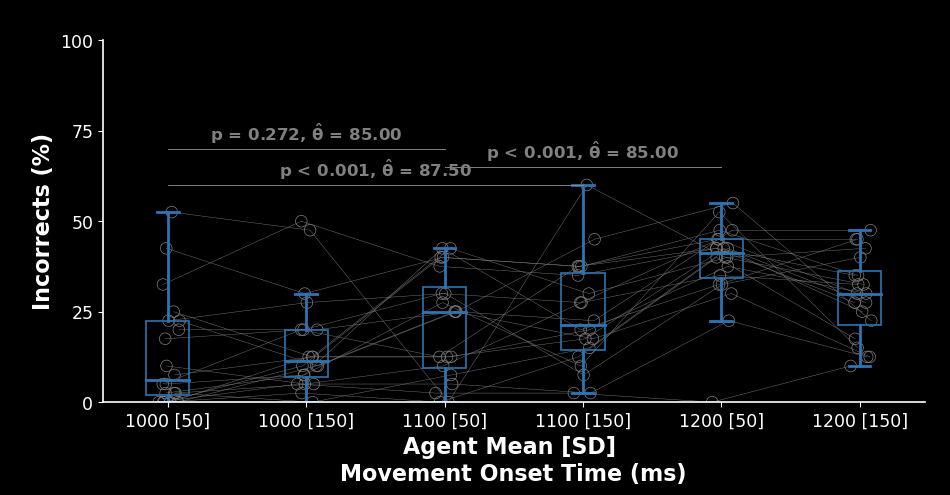

In [ ]:
w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,group.player_perc_incorrects,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=group.player_perc_incorrects.T, noise_scale=0.1, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],70,p_val=incorrects_pvals['02'],cles=incorrects_cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],65,p_val=incorrects_pvals['24'],cles=incorrects_cles['24'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[0],xlocs[3],60,p_val=incorrects_pvals['03'],cles=incorrects_cles['03'],fontsize=12,h=1)

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))
ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Agent Mean [SD] \nMovement Onset Time (ms)')
ax.set_ylabel('Incorrects (%)')

if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

## Indecisions

### Stats

Anova

In [ ]:
anova = pg.rm_anova(data=df, dv='Indecisions', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,2478.229167,2,38,1239.114583,7.929081,0.001325,0.001741,0.101806,0.934863
1,Condition SD,163.333333,1,19,163.333333,1.784807,0.197343,0.197343,0.007415,1.000000
2,Condition Mean * Condition SD,1343.854167,2,38,671.927083,4.774518,0.014132,0.024576,0.057904,0.743475


Follow up Comparisons (don't collapse)

In [ ]:
indecisions_pvals,indecisions_cles = sf.pairwise_bootstrap(group.player_perc_indecisions)
print(indecisions_pvals)
print(indecisions_cles)

[3.737000e-04 4.300000e-06 1.499000e-04 1.743600e-03 3.663000e-03
 9.958500e-03 2.030103e-01 5.208350e-02 6.087976e-01 8.190630e-02
 6.133105e-01 1.910500e-02 1.177869e-01 4.042561e-01 6.185110e-02]
{'01': 0.0048581, '02': 6.450000000000001e-05, '03': 0.0020986, '04': 0.020923200000000003, '05': 0.040293, '12': 0.099585, '13': 0.8120412, '14': 0.416668, '15': 1.2175952, '23': 0.49143780000000004, '24': 0.6133105, '25': 0.17194500000000001, '34': 0.5889345, '35': 1.2127683, '45': 0.4329577}
{'01': 0.0048581, '02': 6.450000000000001e-05, '03': 0.0020986, '04': 0.020923200000000003, '05': 0.040293, '12': 0.099585, '13': 0.8120412, '14': 0.416668, '15': 1.2175952, '23': 0.49143780000000004, '24': 0.6133105, '25': 0.17194500000000001, '34': 0.5889345, '35': 1.2127683, '45': 0.4329577}
{'01': 80.0, '02': 85.0, '03': 77.5, '04': 67.5, '05': 72.5, '12': 72.5, '13': 55.00000000000001, '14': 60.0, '15': 50.0, '23': 60.0, '24': 62.5, '25': 70.0, '34': 57.49999999999999, '35': 62.5, '45': 67.5}


 Boxplot

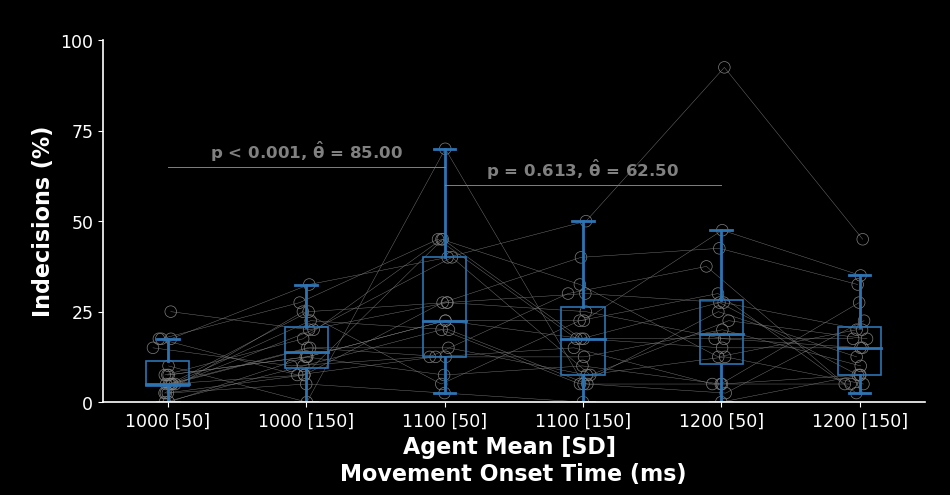

In [ ]:
w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,group.player_perc_indecisions ,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=group.player_perc_indecisions .T, noise_scale=0.1, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],65,p_val=indecisions_pvals['02'],cles=indecisions_cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],60,p_val=indecisions_pvals['24'],cles=indecisions_cles['24'],fontsize=12,h=1)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Agent Mean [SD] \nMovement Onset Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

Boxplot just 50ms

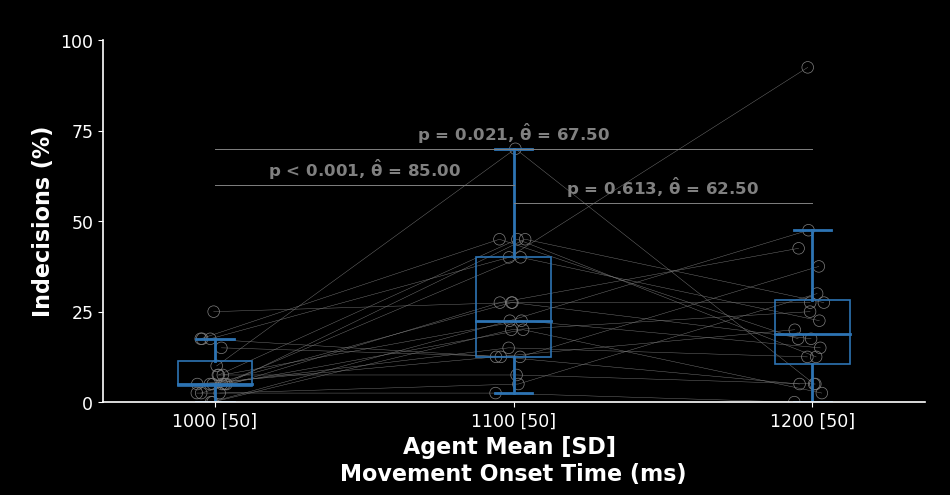

In [ ]:
metric = group.player_perc_indecisions[:,::2] 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w/2,num=len(trial_block_titles)//2)
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.1, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[1],60,p_val=indecisions_pvals['02'],cles=indecisions_cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[1],xlocs[2],55,p_val=indecisions_pvals['24'],cles=indecisions_cles['24'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[0],xlocs[2],70,p_val=indecisions_pvals['04'],cles=indecisions_cles['04'],fontsize=12,h=1)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles[::2])
ax.set_ylim(0,100)
ax.set_xlabel('Agent Mean [SD] \nMovement Onset Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()

## Correct Initial Decisions

### Stats

Anova

In [ ]:
anova = pg.rm_anova(data=df, dv='Correct Decisions', within=['Condition Mean','Condition SD'], subject='Subject', detailed=True)
# dill.dump(anova,open(save_path+'\\median_leave_time_anova_df.pkl','wb')) 
anova

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Condition Mean,1.743792,2,38,0.871896,62.078929,1.064306e-12,1.604211e-09,0.465545,0.699234
1,Condition SD,0.057422,1,19,0.057422,6.133070,2.284266e-02,2.284266e-02,0.027884,1.000000
2,Condition Mean * Condition SD,0.000375,2,38,0.000188,0.020021,9.801883e-01,9.717912e-01,0.000187,0.894300


Follow up Comparisons (don't collapse)

In [ ]:
corrects_pvals,corrects_cles = sf.pairwise_bootstrap(group.phat_correct)
print(corrects_pvals)
print(corrects_cles)

[3.473190e-02 1.606670e-02 0.000000e+00 0.000000e+00 0.000000e+00
 1.071355e-01 1.950000e-05 0.000000e+00 0.000000e+00 3.324610e-01
 0.000000e+00 0.000000e+00 2.500000e-06 0.000000e+00 5.455770e-02]
{'01': 0.1389276, '02': 0.0803335, '03': 0.0, '04': 0.0, '05': 0.0, '12': 0.214271, '13': 0.000117, '14': 0.0, '15': 0.0, '23': 0.332461, '24': 0.0, '25': 0.0, '34': 1.7500000000000002e-05, '35': 0.0, '45': 0.16367310000000002}
{'01': 0.1389276, '02': 0.0803335, '03': 0.0, '04': 0.0, '05': 0.0, '12': 0.214271, '13': 0.000117, '14': 0.0, '15': 0.0, '23': 0.332461, '24': 0.0, '25': 0.0, '34': 1.7500000000000002e-05, '35': 0.0, '45': 0.16367310000000002}
{'01': 65.0, '02': 85.0, '03': 87.5, '04': 92.5, '05': 95.0, '12': 75.0, '13': 87.5, '14': 90.0, '15': 92.5, '23': 57.49999999999999, '24': 87.5, '25': 95.0, '34': 87.5, '35': 92.5, '45': 70.0}


 Boxplot

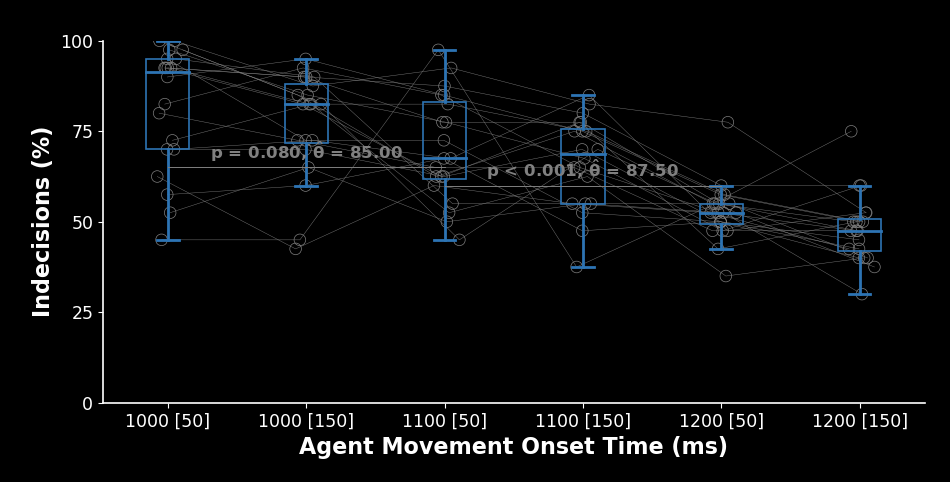

In [ ]:
metric = group.phat_correct*100 

w,h = 12,6
axmain,ax = pf.make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
pf.multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.1, include_mean = False, circle_size=70)
dv.stat_annotation(ax,xlocs[0],xlocs[2],65,p_val=corrects_pvals['02'],cles=corrects_cles['02'],fontsize=12,h=1)
dv.stat_annotation(ax,xlocs[2],xlocs[4],60,p_val=corrects_pvals['24'],cles=corrects_cles['24'],fontsize=12,h=1)
ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Agent Movement Onset Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    plt.savefig(SAVE_PATH+'wins', dpi = 400, transparent = True)

axmain.set_axis_off()

plt.show()